In [1]:
# Folgender Code muss zu Beginn des Notebooks ausgeführt werden,
# er importiert alle notwendigen Bibliotheken.
import numpy as np
import copy
import matplotlib.pyplot as plt
from collections import deque
from ipywidgets import interact, interactive, interactive_output, fixed, interact_manual
import ipywidgets as widgets
from Widgets3D import *

In [3]:
minRange = 0.3  # m
maxRange = 25.0  # m
maxVelocity = 25  # m/s --> 90 km/h
rangeAccuracy = 0.02  # m
velocityAccuracy = 0.005  # m/s
measurementRate = 100  # Hz

def GenerateData(type="Static", options={}):

    # static
    if(type == "Static"):
        # sanity check
        if(("initialDistance" in options) == False) \
                or (("stopTime" in options) == False):
            return None, None

        timeAxis = np.arange(0, options["stopTime"], 0.01/measurementRate)
        distValues = options["initialDistance"] * \
            np.ones(np.shape(timeAxis))
        truthDistValues = copy.copy(distValues)

        distValues += np.random.uniform(-1*rangeAccuracy,
                                           rangeAccuracy, np.shape(timeAxis))
        velValues = np.zeros(np.shape(timeAxis))
        truthVelValues = copy.copy(velValues)

        velValues += np.random.uniform(-1*velocityAccuracy,
                                          velocityAccuracy, np.shape(timeAxis))
        velValues[distValues > maxRange] = np.NaN
        distValues[distValues > maxRange] = np.NaN
        velValues[distValues < minRange] = np.NaN
        distValues[distValues < minRange] = np.NaN        
        velValues[velValues > maxVelocity] = np.NaN
        velValues[velValues < -1 * maxVelocity] = np.NaN

        # decimate to actual measurement rate
        timeAxis = timeAxis[0::100]
        distValues = distValues[0::100]
        velValues = velValues[0::100]
        truthDistValues = truthDistValues[0::100]
        truthVelValues = truthVelValues[0::100]
    
        if("SporadicError" in options):
            rng = np.random.default_rng()
            ind = rng.choice(np.size(timeAxis), size=options["SporadicError"], replace=False)

            distValues[ind] = np.random.uniform(minRange,
                                           maxRange, np.shape(ind))

            velValues[ind] = np.random.uniform(-1*maxVelocity,
                                           maxVelocity, np.shape(ind))

        return timeAxis, distValues, velValues, truthDistValues, truthVelValues

    # constant velocity
    if(type == "ConstantVelocity"):
        # sanity check
        if(("initialDistance" in options) == False) \
                or (("stopTime" in options) == False) \
                or (("velocity" in options) == False):
            return None, None

        timeAxis = np.arange(0, options["stopTime"], 0.01/measurementRate)

        distValues = options["initialDistance"] + options["velocity"]*timeAxis
        truthDistValues = copy.copy(distValues)

        distValues += np.random.uniform(-1*rangeAccuracy,
                                           rangeAccuracy, np.shape(timeAxis))

        velValues = options["velocity"] * np.ones(np.shape(timeAxis))
        truthVelValues = copy.copy(velValues)

        velValues += np.random.uniform(-1*velocityAccuracy,
                                          velocityAccuracy, np.shape(timeAxis))
        velValues[distValues > maxRange] = np.NaN
        distValues[distValues > maxRange] = np.NaN
        velValues[distValues < minRange] = np.NaN
        distValues[distValues < minRange] = np.NaN
        velValues[velValues > maxVelocity] = np.NaN
        velValues[velValues < -1 * maxVelocity] = np.NaN
        
        # decimate to actual measurement rate
        timeAxis = timeAxis[0::100]
        distValues = distValues[0::100]
        velValues = velValues[0::100]
        truthDistValues = truthDistValues[0::100]
        truthVelValues = truthVelValues[0::100]
    
        if("SporadicError" in options):
            rng = np.random.default_rng()
            ind = rng.choice(np.size(timeAxis), size=options["SporadicError"], replace=False)

            distValues[ind] = np.random.uniform(minRange,
                                           maxRange, np.shape(ind))

            velValues[ind] = np.random.uniform(-1*maxVelocity,
                                           maxVelocity, np.shape(ind))

        return timeAxis, distValues, velValues

    # constant acceleration
    if(type == "ConstantAcceleration"):
        # sanity check
        if(("initialDistance" in options) == False) \
                or (("stopTime" in options) == False) \
                or (("initialVelocity" in options) == False) \
                or (("acceleration" in options) == False):
            return None, None

        timeAxis = np.arange(0, options["stopTime"], 0.01/measurementRate)

        velValues = options["initialVelocity"] + \
            options["acceleration"] * timeAxis
        distValues = options["initialDistance"] + 0.5 * \
            options["acceleration"] * timeAxis * timeAxis

        truthVelValues = copy.copy(velValues)
        truthDistValues = copy.copy(distValues)

        velValues += np.random.uniform(-1*velocityAccuracy,
                                          velocityAccuracy, np.shape(timeAxis))
        distValues += np.random.uniform(-1*rangeAccuracy,
                                           rangeAccuracy, np.shape(timeAxis))

        velValues[distValues > maxRange] = np.NaN
        distValues[distValues > maxRange] = np.NaN
        velValues[distValues < minRange] = np.NaN
        distValues[distValues < minRange] = np.NaN
        velValues[velValues > maxVelocity] = np.NaN
        velValues[velValues < -1 * maxVelocity] = np.NaN
        
        # decimate to actual measurement rate
        timeAxis = timeAxis[0::100]
        distValues = distValues[0::100]
        velValues = velValues[0::100]
        truthDistValues = truthDistValues[0::100]
        truthVelValues = truthVelValues[0::100]
    
        if("SporadicError" in options):
            rng = np.random.default_rng()
            ind = rng.choice(np.size(timeAxis), size=options["SporadicError"], replace=False)

            distValues[ind] = np.random.uniform(minRange,
                                           maxRange, np.shape(ind))

            velValues[ind] = np.random.uniform(-1*maxVelocity,
                                           maxVelocity, np.shape(ind))

        return timeAxis, distValues, velValues, truthDistValues, truthVelValues

    # sinus movement
    if(type == "Sinus"):
        # sanity check
        if(("initialDistance" in options) == False) \
                or (("stopTime" in options) == False) \
                or (("movementRange" in options) == False) \
                or (("frequency" in options) == False):
            return None, None

        timeAxis = np.arange(0, options["stopTime"], 0.01/measurementRate)

        distValues = options["initialDistance"] + options["movementRange"] * \
            np.sin(2*np.pi*options["frequency"]*timeAxis)

        truthDistValues = copy.copy(distValues)

        velValues = 2*np.pi*options["frequency"] * options["movementRange"] * np.cos(
            2*np.pi*options["frequency"]*timeAxis)

        truthVelValues = copy.copy(velValues)

        velValues += np.random.uniform(-1*velocityAccuracy,
                                          velocityAccuracy, np.shape(timeAxis))
        distValues += np.random.uniform(-1*rangeAccuracy,
                                           rangeAccuracy, np.shape(timeAxis))

        velValues[distValues > maxRange] = np.NaN
        distValues[distValues > maxRange] = np.NaN
        velValues[distValues < minRange] = np.NaN
        distValues[distValues < minRange] = np.NaN
        velValues[velValues > maxVelocity] = np.NaN
        velValues[velValues < -1 * maxVelocity] = np.NaN
        
        # decimate to actual measurement rate
        timeAxis = timeAxis[0::100]
        distValues = distValues[0::100]
        velValues = velValues[0::100]
        truthDistValues = truthDistValues[0::100]
        truthVelValues = truthVelValues[0::100]
    
        if("SporadicError" in options):
            rng = np.random.default_rng()
            ind = rng.choice(np.size(timeAxis), size=options["SporadicError"], replace=False)

            distValues[ind] = np.random.uniform(minRange,
                                           maxRange, np.shape(ind))

            velValues[ind] = np.random.uniform(-1*maxVelocity,
                                           maxVelocity, np.shape(ind))

        return timeAxis, distValues, velValues, truthDistValues, truthVelValues

    # triangle movement
    if(type == "Triangle"):
        # sanity check
        if(("initialDistance" in options) == False) \
                or (("stopTime" in options) == False) \
                or (("movementRange" in options) == False) \
                or (("frequency" in options) == False):
            return None, None

        timeAxis = np.arange(0, options["stopTime"], 0.01/measurementRate)

        distValues = np.zeros(np.shape(timeAxis))
        velValues = np.zeros(np.shape(timeAxis))

        for i in range(np.size(timeAxis)):
            t = timeAxis[i]
            while (t > 1/options["frequency"]):
                t = t - 1/options["frequency"]

            if (t <= 1/(2*options["frequency"])):
                if(i == 0):
                    distValues[i] = options["initialDistance"] + (2 * options["frequency"] * options["movementRange"])*0.01/measurementRate
                else:
                    distValues[i] = distValues[i-1] + (2 * options["frequency"] * options["movementRange"])*0.01/measurementRate
                
                velValues[i] = 2 * options["frequency"] * options["movementRange"]   
            else:
                distValues[i] = distValues[i-1] - (2 * options["frequency"] * options["movementRange"])*0.01/measurementRate
                velValues[i] = -2 * options["frequency"] * options["movementRange"]   

        truthDistValues = copy.copy(distValues)
        truthVelValues = copy.copy(velValues)

        velValues += np.random.uniform(-1*velocityAccuracy,
                                          velocityAccuracy, np.shape(timeAxis))
        distValues += np.random.uniform(-1*rangeAccuracy,
                                           rangeAccuracy, np.shape(timeAxis))

        velValues[distValues > maxRange] = np.NaN
        distValues[distValues > maxRange] = np.NaN
        velValues[distValues < minRange] = np.NaN
        distValues[distValues < minRange] = np.NaN
        velValues[velValues > maxVelocity] = np.NaN
        velValues[velValues < -1 * maxVelocity] = np.NaN
        # decimate to actual measurement rate
        timeAxis = timeAxis[0::100]
        distValues = distValues[0::100]
        velValues = velValues[0::100]
        truthDistValues = truthDistValues[0::100]
        truthVelValues = truthVelValues[0::100]
    
        if("SporadicError" in options):
            rng = np.random.default_rng()
            ind = rng.choice(np.size(timeAxis), size=options["SporadicError"], replace=False)

            distValues[ind] = np.random.uniform(minRange,
                                           maxRange, np.shape(ind))

            velValues[ind] = np.random.uniform(-1*maxVelocity,
                                           maxVelocity, np.shape(ind))

        return timeAxis, distValues, velValues, truthDistValues, truthVelValues

    else:
        return 0, 0

In [5]:
class KalmanFilter:
    # Initialisierung von Kalman Filter
    def __init__(self, s_hat, transition_model, H, Q, R):
        self.s_hat = s_hat
        self.P_hat = np.eye(len(s_hat)) * 100
        self.model = transition_model
        self.H = H # Measurement Function
        self.Q = Q # Process Noise
        self.R = R # Measurement Noise.
        pass


    def step(self,z):
        # Prediction
        s_hat_p = self.model @ self.s_hat
        P_hat_p = self.model @ self.P_hat @ self.model.T +  self.Q
        # Calculate Kalman Matrix
        K = P_hat_p @ self.H.T @ np.linalg.inv(self.H @ P_hat_p @ self.H.T + self.R)
        # Update covariance of estimation error
        self.P_hat = self.P_hat - K @ self.H @ self.P_hat
        # Improve estimate
        e_m_p = z - self.H @ s_hat_p
        self.s_hat = s_hat_p + K @ e_m_p
        
        return self.s_hat
    
    

if __name__ == "__main__":
    
    # Measurement Error
    ## Variance of a uniform distribution is given by (b-a)**2/12.
    R = np.diag([1**2, 1**2])/3
    # todo: Add variance.
    Q = np.diag([0.05,0.05,0.05])
    # todo: add column for acceleration
    s0 = np.array([[1,1],
                   [2,2],
                   [3,3]])
    #todo: Add acceleration.
    transition_model = np.array([[1, 0.01, 0.01/2],
                                 [0, 1, 0.01],
                                 [0, 0, 0.01]])
    # todo: adjust H for accomodating acceleration.
    H =  np.array([[1., 0., 0.],
                   [0., 1., 0.]])
    kf = KalmanFilter(s0, transition_model, H, Q, R)

In [6]:
# Optionen für die Simulation
opt = {
    "initialDistance": 8,
    "stopTime": 1,
    # "velocity": 3,
    # "SporadicError": 2
     "initialVelocity": 3,
     "acceleration": 1,
    # "movementRange": 1,
    # "frequency": 2,
    # "SporadicError": 2
    }

# timeAxis, distValues, velValues = GenerateData(type="ConstantVelocity", options=opt)
timeAxis, distValues, velValues, truthDistValues, truthVelValues = GenerateData(type="ConstantAcceleration", options=opt)

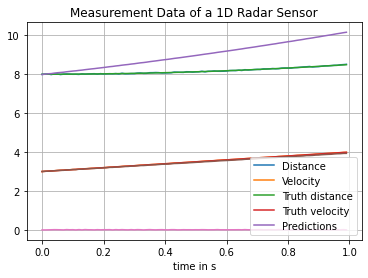

In [7]:
R = np.diag([rangeAccuracy**2, velocityAccuracy**2])/3
Q = Q_discrete_white_noise(dim=3, dt=1., var=0.01)
s0 = np.array([distValues[0], velValues[0], 0])
transition_model = np.array([[1, 0.01, 0.01/2],
                             [0, 1, 0.01],
                             [0, 0, 0.01]])
H =  np.array([[1., 0., 0.],
               [0., 1., 0.]])

KalmanFilter = KalmanFilter(s0, transition_model, H, Q, R)

Predictions = [s0]
for i in range(1,np.size(timeAxis)):
    s = np.array([distValues[i], velValues[i]])
    pred = KalmanFilter.step(s)
    Predictions.append(pred)

plt.figure()
plt.plot(timeAxis, distValues)
plt.plot(timeAxis, velValues)
plt.plot(timeAxis, truthDistValues)
plt.plot(timeAxis, truthVelValues)
plt.plot(timeAxis, Predictions)
plt.xlabel("time in s")
plt.legend(["Distance", "Velocity", "Truth distance", "Truth velocity", "Predictions"])
plt.title("Measurement Data of a 1D Radar Sensor")
plt.grid(True)
plt.show()

# Um wie viel hat sich die Messgenauigkeit verbessert?
# Wie beeinflussen die Schätzung der Kovarianzmatrix Q und R die Genauigkeit
# Fügen Sie zufällige Messfehler mit der Parameter "SporadicError" hinzu, wie verhält sich das Kalman Filter?


In [8]:
minRange = 0.3  # m
maxRange = 25.0  # m
maxVelocity = 25  # m/s --> 90 km/h
rangeAccuracy = 0.05  # m
velocityAccuracy = 0.005  # m/s
measurementRate = 30  # Hz
sensorPosition = np.array([0,0,0.8]) # x,y,z-coordinate of the sensor

In [9]:
class Target:
    def __init__(self, opt):
        self.ValidateOption(opt)
        self.currentPosition = self.opt['InitialPosition']
        self.Trajectory = [self.opt['InitialPosition']]
        self.velocityVector = np.zeros((3,))
        self.pathCounter = 0  
        self.reachedEnd = False      

    def ValidateOption(self, opt):
        if(('InitialPosition' in opt) == False):
            raise Exception("Missing value for 'InitialPosition'")
        else:
            if(type(opt['InitialPosition']) is not np.ndarray):
                raise Exception("InitialPosition should be a np.ndarray with the shape (3,).")
            else:
                if(np.shape(opt['InitialPosition']) != (3,)):
                    raise Exception("InitialPosition should be a np.ndarray with the shape (3,).")

        if(('Path' in opt) == False):
            raise Exception("Missing value for 'Path'")
        else:
            if(type(opt['Path']) is not np.ndarray):
                raise Exception("Path should be a np.ndarray with the shape (3,n).")
            else:
                if(np.size(opt['Path'],0) != 3):
                    raise Exception("Path should be a np.ndarray with the shape (3,n).")

        if(('Velocities' in opt) == False):
            raise Exception("Missing value for 'Velocities'")
        else:
            if(type(opt['Velocities']) is not np.ndarray):
                raise Exception("Velocities should be a np.ndarray with the shape (1,n).")
            else:
                if(np.size(opt['Velocities'],0) != 1):
                    raise Exception("Velocities should be a np.ndarray with the shape (1,n).")

                if(np.size(opt['Velocities'],1) != np.size(opt['Path'],1)):
                    raise Exception("Velocities and Path should have the same length.")

        self.opt = opt

    def Step(self, deltaTime):
        # check if we are at the end
        if(self.pathCounter > np.size(self.opt['Path'],1) - 1):
            self.reachedEnd = True
            return self.currentPosition, self.velocityVector
                
        velocityVector = self.__GetVelocityVector(self.currentPosition, self.opt['Path'][:, self.pathCounter], self.opt['Velocities'][0, self.pathCounter])

        # try to step
        nextPosition = self.currentPosition + velocityVector * deltaTime

        # now check if we are within the next path target
        if(np.linalg.norm(nextPosition - self.currentPosition) < np.linalg.norm(self.opt['Path'][:, self.pathCounter] - self.currentPosition)):
            self.currentPosition = nextPosition
            self.Trajectory.append(nextPosition)
            self.velocityVector = velocityVector
            return self.currentPosition, self.velocityVector

        else: # we have to microstep
            # get the time to current path target
            countDown = deltaTime
            stepFurther = True
            while(stepFurther == True):
                microtime = (np.linalg.norm(self.opt['Path'][:, self.pathCounter] - self.currentPosition)/np.linalg.norm(nextPosition - self.currentPosition)) * countDown
                resttime = countDown - microtime

                if(self.pathCounter + 1 == np.size(self.opt['Path'],1)):
                    stepFurther == False
                    self.pathCounter = self.pathCounter + 1
                    self.velocityVector = np.zeros((3,))
                    self.currentPosition = self.opt['Path'][:, self.pathCounter - 1]
                    self.reachedEnd = True
                    return self.currentPosition, self.velocityVector

                velocityVector = self.__GetVelocityVector(self.opt['Path'][:, self.pathCounter], self.opt['Path'][:, self.pathCounter + 1], self.opt['Velocities'][:, self.pathCounter + 1])
                # try to step
                nextPosition = self.opt['Path'][:, self.pathCounter] + velocityVector * resttime

                if(np.linalg.norm(nextPosition - self.opt['Path'][:, self.pathCounter]) < np.linalg.norm(self.opt['Path'][:, self.pathCounter + 1] - self.opt['Path'][:, self.pathCounter])):
                    stepFurther = False 

                # we proceed to next path target
                self.pathCounter = self.pathCounter + 1

            self.velocityVector = velocityVector
            self.currentPosition = nextPosition
            self.Trajectory.append(nextPosition)
            return self.currentPosition, self.velocityVector

    def __GetVelocityVector(self, Position1, Position2, Velocity):
        targetPosition = Position2
        movementDirection = targetPosition - Position1
        movementDirection = movementDirection / np.linalg.norm(movementDirection)

        return Velocity * movementDirection
    
class RadarSensor:
    def __init__(self, opt):
        self.ValidateOption(opt)
        opt['MinRange'] = minRange
        opt['MaxRange'] = maxRange
        opt['MaxVelocity'] = maxVelocity
        opt['RangeAccuracy'] = rangeAccuracy
        opt['VelocityAccuracy'] = velocityAccuracy
        opt['MeasurementRate'] = 30

    def ValidateOption(self, opt):
        if(('Position' in opt) == False):
            raise Exception("Missing value for 'Position'")
        else:
            if(type(opt['Position']) is not np.ndarray):
                raise Exception("Position should be a np.ndarray with the shape (3,).")
            else:
                if(np.shape(opt['Position']) != (3,)):
                    raise Exception("Position should be a np.ndarray with the shape (3,).")

        if(('OpeningAngle' in opt) == False):
            raise Exception("Missing value for 'OpeningAngle'")
        else:
            if(type(opt['OpeningAngle']) is not np.ndarray):
                raise Exception("OpeningAngle should be a np.ndarray with the shape (2,).")
            else:
                if(np.size(opt['OpeningAngle'],0) != 2):
                    raise Exception("OpeningAngle should be a np.ndarray with the shape (2,).")

        self.opt = opt

    def Detect(self, targets):
        if len(targets) == 0:
            return None

        # initiate list
        detections = []

        # looping through targets
        for target in targets:
            visibleHor = False
            visibleVer = False
            
            # check horizontal angle
            horAngle = np.rad2deg(np.arctan((target.currentPosition[0] - self.opt['Position'][0])/(target.currentPosition[1] - self.opt['Position'][1])))
            if(np.abs(horAngle) < self.opt['OpeningAngle'][0]/2.0):
                visibleHor = True

            # check vertical angle
            verAngle = np.rad2deg(np.arctan((target.currentPosition[2] - self.opt['Position'][2])/(target.currentPosition[1] - self.opt['Position'][1])))
            if(np.abs(verAngle) < self.opt['OpeningAngle'][1]/2.0):
                visibleVer = True

            # if target visible
            if(visibleVer == True and visibleHor == True):            
                currPos = target.currentPosition - self.opt['Position']

                if(np.linalg.norm(currPos) > self.opt['MinRange'] and np.linalg.norm(currPos) < self.opt['MaxRange']):
                    bVector = self.opt['Position'] - target.currentPosition
                    radialVelocityToSensor = (np.dot(target.velocityVector, bVector)/np.dot(bVector, bVector)) + np.random.uniform(-1*self.opt['VelocityAccuracy'],self.opt['VelocityAccuracy'],1)
                    currPos = currPos + np.random.uniform(-1*self.opt['RangeAccuracy'],self.opt['RangeAccuracy'],3)
                    currPos = np.append(currPos, radialVelocityToSensor)

                    if(radialVelocityToSensor < self.opt['MaxVelocity']):
                        detections.append(currPos)


        # add noise / false detection ?
        if(('FalseDetection' in self.opt) == True):
            if(self.opt['FalseDetection'] == True):
                for i in range(20):
                    randPos = np.random.uniform(self.opt['MinRange'], 2 * self.opt['MaxRange'], 3)
                    randVel = np.random.uniform(0, 2 * self.opt['MaxVelocity'], 1)
                    visibleHor = False
                    visibleVer = False
                    
                    # check horizontal angle
                    horAngle = np.rad2deg(np.arctan((randPos[0] - self.opt['Position'][0])/(randPos[1] - self.opt['Position'][1])))
                    if(np.abs(horAngle) < self.opt['OpeningAngle'][0]/2.0):
                        visibleHor = True

                    # check vertical angle
                    verAngle = np.rad2deg(np.arctan((randPos[2] - self.opt['Position'][2])/(randPos[1] - self.opt['Position'][1])))
                    if(np.abs(verAngle) < self.opt['OpeningAngle'][1]/2.0):
                        visibleVer = True

                    # if target visible
                    if(visibleVer == True and visibleHor == True):            
                        randPos = randPos - self.opt['Position']

                        if(np.linalg.norm(randPos) > self.opt['MinRange'] and np.linalg.norm(randPos) < self.opt['MaxRange']):
                            bVector = self.opt['Position'] - randPos
                            randPos = randPos + np.random.uniform(-1*self.opt['RangeAccuracy'],self.opt['RangeAccuracy'],3)
                            randPos = np.append(randPos, randVel)
                            if(randVel < self.opt['MaxVelocity']):
                                detections.append(randPos)

        return detections


In [11]:
'''
How does DBSCAN work: https://en.wikipedia.org/wiki/DBSCAN
'''
import numpy as np
# deque provides an O(1) time complexity for append and pop operations instead of O(n) for lists.
from collections import deque
# dataset to toy around with.
from sklearn.datasets import make_moons

def pairwise_sq_distance(X1, X2):
    # Calculate the pairwise distance between all pairs of points from X1 and X2.
    return np.sum(X1**2, axis=1, keepdims=True) - 2*np.matmul(X1, X2.T) + np.sum(X2**2, axis=1, keepdims=True).T

class DBSCAN():
    
    def __init__(self, eps=0.5, minpts=5):
        self.eps = eps
        self.minpts = minpts
        
    def fit(self, X):
        dist = pairwise_sq_distance(X, X)
        neighbours = list(map(lambda d: np.arange(d.shape[0])[d < self.eps**2], dist))
        
        # Label all points as outliers initially.
        self.assignment = np.full((X.shape[0],), -1, dtype=int)
        # Find core points.
        ## Determine the number of neighbors of each point.
        N_neighbors = np.sum(dist < self.eps**2, axis=1)
        self.assignment[N_neighbors >= self.minpts] = -2
        
        # Create clusters.
        cluster = 0
        stack = deque()
        for p in range(X.shape[0]):
            if self.assignment[p] != -2:
                continue
                
            self.assignment[p] = cluster
            
            stack.extend(neighbours[p])
            # Expand cluster outwards. 
            while len(stack) > 0:
                n = stack.pop()
                label = self.assignment[n]
                # If core point include all points in ε-neighborhood.
                if label == -2:
                    stack.extend(neighbours[n])
                # If not core point (edge of cluster).
                if label < 0:
                    self.assignment[n] = cluster
            
            cluster += 1
            
    def fit_predict(self, X):
        self.fit(X)
        return self.assignment
    
    def predict(self,X):
        return self.assignment
    
if __name__ == '__main__':
    X,y = make_moons(100)
    model = DBSCAN()
    preds = model.fit_predict(X)
    # Either low or high values are good since DBSCAN might switch class labels.
    print(f"Accuracy: {round((sum(preds == y)/len(preds))*100,2)}%")

Accuracy: 100.0%


In [12]:
%matplotlib notebook

def update(eps, minpts, targ_select, plt_fdets):
    
    # initialize DBScan
    model = DBSCAN(eps, minpts)
    
    # clear graph on update
    ax.clear()
    
    # Parameters first target
    path1 = [[0,5,0],
            [0,5,0.5],
            [1,5,1],
            [1,5,0.5],
            [0.5, 2, 0.1]]
    
    vel1 = 3 * np.ones((1,5))
    vel1[0,2] = 1

    InitialPosition1 = np.array([-1,5,0])

    opt1 = {
        'InitialPosition' : InitialPosition1,
        'Path' : np.array(path1).transpose(),
        'Velocities' : vel1
    }
    
    # Parameters second target
    path2 = [[1. , 4. , 1. ],
             [1. , 5. , 1.7],
             [2. , 5. , 1. ],
             [3. , 4. , 2. ],
             [3. , 4. , 1.5],
             [2. , 4. , 2. ]]

    vel2 = 2 * np.ones((1,len(path2)))
    vel2[0,4] = 0.5

    InitialPosition2 = np.array([2,4,1])

    opt2 = {
        'InitialPosition' : InitialPosition2,
        'Path' : np.array(path2).transpose(),
        'Velocities' : vel2
    }

    # Parameters third target
    path3 = [[1. , 4. , 1. ],
             [1. , 5. , 1.],
             [2. , 5. , 1. ],
             [3.5 , 4. , 2. ],
             [3. , 4.1 , 1.],
             [2.2 , 4. , 2. ]]

    vel3 = 2 * np.ones((1,len(path3)))
    vel3[0,4] = 0.3

    InitialPosition3 = np.array([3,4,5])

    opt3 = {
        'InitialPosition' : InitialPosition3,
        'Path' : np.array(path3).transpose(),
        'Velocities' : vel3
    }
    
    # Parameters fourth target
    path4 = [[1.5 , 4.2 , 1.5 ],
             [1.5 , 5.2 , 1.2],
             [2.5 , 5.2 , 1.2 ],
             [3.5 , 4.2 , 2.2 ],
             [3.5 , 4.1 , 1.4],
             [2.2 , 4.2 , 2.3 ]]

    vel4 = 2 * np.ones((1,len(path4)))
    vel4[0,4] = 0.7

    InitialPosition4 = np.array([4,4,4])

    opt4 = {
        'InitialPosition' : InitialPosition4,
        'Path' : np.array(path4).transpose(),
        'Velocities' : vel4
    }
    
    # Instantiate targets
    t_1 = Target(opt1)
    t_2 = Target(opt2)
    t_3 = Target(opt3)
    t_4 = Target(opt4)
    
    # Target and colors dictionary for interact
    target_dict = {'Target 1': t_1, 'Target 2': t_2, 'Target 3': t_3, 'Target 4': t_4}
    target_colors = {'Target 1': 'limegreen', 'Target 2': 'darkcyan', 'Target 3': 'darkviolet', 'Target 4': 'deeppink'}
    colors_list = []
    targets = list()
    
    # target selection for interact
    for target in targ_select:
        if target in target_dict:
            targets.append(target_dict[target])
            colors_list.append(target_colors[target])
    
    '''
    Setup the radar sensor
    The radar sensor points always to the direction along the y axis
    (see diagram in the note)
    '''

    optRadar = {
        'Position' : np.array([0,0,0.5]),
        'OpeningAngle' : np.array([120,90]), # [Horizontal, Vertical]
        'FalseDetection': True
    }
    sensor = RadarSensor(optRadar)

    # Measurement error.
    ## Variance of a uniform distribution is given by (b-a)**2/12.
    R = np.diag([rangeAccuracy**2])/3
    # Process error.
    Q = np.diag([0.05,0.05,0.05])
    # Process/transition model.
    transition_model = np.array([[1, 0.01, 0.01/2],
                                 [0, 1, 0.01],
                                 [0, 0, 0.01]])
    # Transformation matrix
    ## Transforms predicted quantities into outputs that can be compared to the measurements
    H =  np.array([[1., 0., 0.]])
    
    getNext = True
    Detections = np.array([0,0,0])

    # Number of previous measurements to consider for DBSCAN().
    ante = 20
    # Count number of iterations
    i = 0

    while(getNext == True):
        i += 1
        for target in targets:
            target.Step(1/sensor.opt['MeasurementRate'])
            getNext = getNext & ~target.reachedEnd  

        dets = sensor.Detect(targets)
        
        
        
        for det in dets:
            #print(det)
            det = det[:-1]
            Detections = np.vstack((det, Detections))
        
        # Execute once to initialize filters etc. todo: Is there a smarter way to do all below ?
        if i == ante:
            # First application of DBSCAN.
            clusters = model.fit_predict(Detections[:ante])
            # Determine number of targets (objects tracked).
            num_objs = len(set(clusters[clusters > -1]))

            # "Filters" contains a kalman filter for each target.
            Filters = []
            # "Preds" contains the predictions of the path of each target.
            Preds = []
            # Iterate over the targets.
            for j in range(num_objs):
                # Find index of first occurence of target j in clusters. This line is needed to filter out false detections
                obj_idx = np.where(clusters == j)[0][0]
                # Add placeholder values for speed and acceleration in each component to the detection.
                s0 = np.vstack((Detections[obj_idx], np.zeros((2,3))))
                Filters.append(KalmanFilter(s0, transition_model, H, Q, R))
                # For the moment only the predicted position is relevant. todo: incorporate velocity.
                Preds.append(s0[0,:])

        # Cluster and predict position via Kalman filter.
        elif i > ante:
            clusters = model.fit_predict(Detections[:ante])
            for j in range(num_objs):
                # try/ except prevents non-detection of existing object from breaking the program.
                try:
                    obj_idx = np.where(clusters == j)[0][0]
                    # Reshape is needed to make matrix multiplication inside the kalman filter work.
                    s = Detections[obj_idx].reshape(1,3)
                    s_hat = Filters[j].step(s)
                    Preds[j] = np.vstack((s_hat[0,:], Preds[j]))
                except IndexError:
                    print(f"Object {j} not found!")
                    continue
    
    
    
    # Parameters first target.
path1 = [[0,5,0],
         [0,5,0.5],
         [1,4,1],
         [2,3,2],
         [1,5,3],
         [1,5,0.5],
         [0.5, 2, 0.1]]

vel1 = 3 * np.ones((1,len(path1)))
vel1[0,2] = 1

InitialPosition1 = np.array([-1,5,0])

opt1 = {
    'InitialPosition' : InitialPosition1,
    'Path' : np.array(path1).transpose(),
    'Velocities' : vel1
}


# Parameters second target.
path2 = [[1. , 4. , 1. ],
         [1. , 5. , 1.7],
         [2. , 5. , 1. ],
         [3. , 4. , 2. ],
         [3. , 4. , 1.5],
         [2. , 4. , 2. ]]

vel2 = 2 * np.ones((1,len(path2)))
vel2[0,4] = 0.5

InitialPosition2 = np.array([2,4,1])

opt2 = {
    'InitialPosition' : InitialPosition2,
    'Path' : np.array(path2).transpose(),
    'Velocities' : vel2
}


# Instantiate targets
x = Target(opt1)
y = Target(opt2)


targets = [x, y]

'''
Setup the radar sensor
The radar sensor points always to the direction along the y axis
(see diagram in the note)
'''

optRadar = {
    'Position' : np.array([0,0,0.5]),
    'OpeningAngle' : np.array([120,90]), # [Horizontal, Vertical]
    'FalseDetection': True
}
sensor = RadarSensor(optRadar)

# Measurement error.
## Variance of a uniform distribution is given by (b-a)**2/12.
R = np.diag([rangeAccuracy**2])/3
# Process error.
Q = np.diag([0.05,0.05,0.05])
# Process/transition model.
transition_model = np.array([[1, 0.01, 0.01/2],
                             [0, 1, 0.01],
                             [0, 0, 0.01]])
# Transformation matrix
## Transforms predicted quantities into outputs that can be compared to the measurements
H =  np.array([[1., 0., 0.]])


getNext = True
Detections = np.array([0,0,0])
model = DBSCAN(eps=0.2, minpts=2)
# Number of previous measurements to consider for DBSCAN().
ante = 20
# Count number of iterations
i = 0

while(getNext == True):
    i += 1
    for target in targets:
        target.Step(1/sensor.opt['MeasurementRate'])
        getNext = getNext & ~target.reachedEnd  

    dets = sensor.Detect(targets)
    # Exclude radialVelocity for the moment. (todo: include it.)
    for det in dets:
        Detections = np.vstack((det, Detections))
    
    # Execute once to initialize filters etc. todo: Is there a smarter way to do all below ?
    if i == ante:
        # First application of DBSCAN.
        clusters = model.fit_predict(Detections[:ante])
        # Determine number of targets (objects tracked).
        num_objs = len(set(clusters[clusters > -1]))
        
        # "Filters" contains a kalman filter for each target.
        Filters = []
        # "Preds" contains the predictions of the path of each target.
        Preds = []
        # Iterate over the targets.
        for j in range(num_objs):
            # Find index of first occurence of target j in clusters. This line is needed to filter out false detections
            obj_idx = np.where(clusters == j)[0][0]
            # Add placeholder values for speed and acceleration in each component to the detection.
            s0 = np.vstack((Detections[obj_idx,:-1], np.zeros((2,3))))
            Filters.append(KalmanFilter(s0, transition_model, H, Q, R))
            # For the moment only the predicted position is relevant. todo: incorporate velocity.
            Preds.append(s0[0,:])

    # Cluster and predict position via Kalman filter.
    elif i > ante:
        clusters = model.fit_predict(Detections[:ante])
        for j in range(num_objs):
            # try/ except prevents non-detection of existing object from breaking the program.
            try:
                obj_idx = np.where(clusters == j)[0][0]
                # Reshape is needed to make matrix multiplication inside the kalman filter work.
                s = Detections[obj_idx,:-1].reshape(1,3)
                s_hat = Filters[j].step(s)
                Preds[j] = np.vstack((s_hat[0,:], Preds[j]))
            except IndexError:
                print(f"Object {j} not found!")
                continue
    
    # Visualize trajectory.
    for pred, color in zip(Preds, colors_list):
        T = pred[:-1]
        ax.plot3D(T[:,0], T[:,1], T[:,2], color) 
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim3d(0, 5)
    ax.set_ylim3d(0, 5)
    ax.set_zlim3d(0, 5)
    
    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


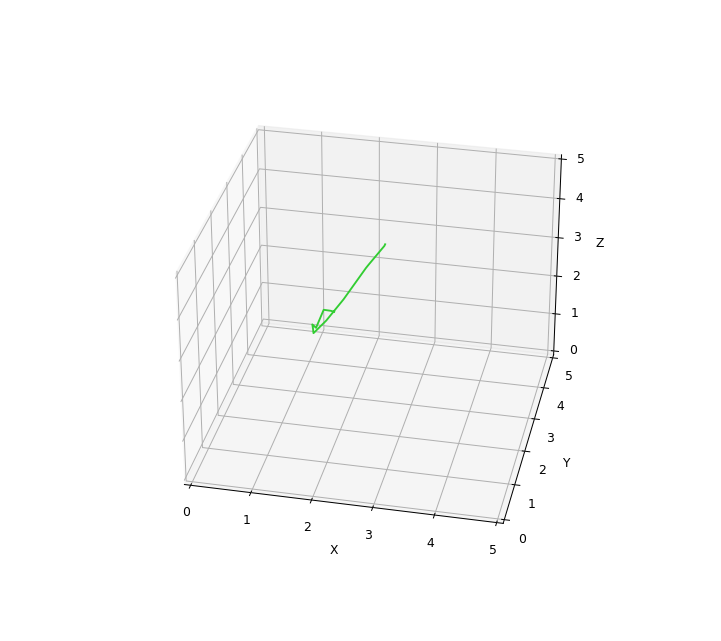

Output()

In [13]:
fig = plt.figure(figsize=(9, 8), dpi=100)
ax = plt.axes(projection='3d')

ui = widgets.VBox([eps_ia, 
                   minpts_ia, 
                   targets_ia,
                   plt_fdets_ia])
out = interactive_output(update, {'eps': eps_ia, 'minpts': minpts_ia, 'targ_select': targets_ia, 'plt_fdets': plt_fdets_ia})
display(ui, out)